# Embeddings visualization

Nuestro objetivo es obtener un modelo de clasificación que prediga, a partir de una muestra de agua, si es potable o no. Luego de observar la distribución de las features y ver que no hay fuerte correlación entre las variables, vamos a analizar si nuestro conjunto de datos es separable para tener una noción de que tan bueno pueden llegar a ser nuestros modelos.

Para ello vamos a utilizar tecnicas de reducción de dimensionalidad, proyección de variables o metodos de compresion, para visualizar nuestro dataset en menos dimensiones, y de esa forma encontrar características que nos den un indicio de los mismos.

El objetivo es ver cómo estan distribuidos nuestros datos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATASET_PATH = '../data/imputed_data.csv'

In [3]:
df = pd.read_csv(DATASET_PATH)

In [4]:
FEATURES = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes',  'Turbidity']

TARGET = "Potability"

In [5]:
from sklearn.preprocessing import StandardScaler

X = StandardScaler().fit_transform(df[FEATURES].values)
y = df[TARGET].values

Creamos una funcion para visualizar los embeddings:

In [6]:
from sklearn.preprocessing import MinMaxScaler

def plot_embedding(X, title):
    _, ax = plt.subplots()
    X = MinMaxScaler().fit_transform(X)

    for digit in [1, 0]:
        ax.scatter(
            *X[y.reshape(-1, ) == digit].T,
            marker=f"${digit}$",
            s=60,
            color=plt.cm.Dark2(digit),
            alpha=0.425,
            zorder=2,
        )

    ax.set_title(title)
    ax.axis("off")
    plt.show()

Calculamos los embeddings:

In [7]:
from sklearn.decomposition import TruncatedSVD, PCA, FastICA
from sklearn.manifold import MDS, TSNE
from umap.umap_ import UMAP

embeddings = {
    "Truncated SVD embedding": TruncatedSVD(n_components=2),
    "PCA embedding": PCA(
        n_components=2,
        random_state=0
    ),
    "ICA embedding": FastICA(
        n_components=2,
        random_state=0
    ),
    "MDS embedding": MDS(
        n_components=2,
        n_init=1,
        max_iter=120,
        random_state=0,
        n_jobs=2),
    "t-SNE embedding": TSNE(
        n_components=2,
        # init="pca",
        # learning_rate="auto",
        # n_iter=500,
        # n_iter_without_progress=150,
        n_jobs=-1,
        random_state=0,
    ),
    "UMAP embedding": UMAP(
        n_components=2,
        random_state=0,
    )
}

In [8]:
projections = {}
for name, transformer in embeddings.items():
    projections[name] = transformer.fit_transform(X, y)
    

c:\Users\andre\workspace\aprendizaje-de-maquina-I\env\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
c:\Users\andre\workspace\aprendizaje-de-maquina-I\env\Lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


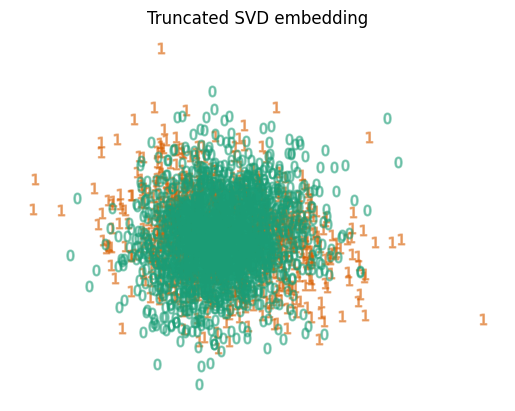

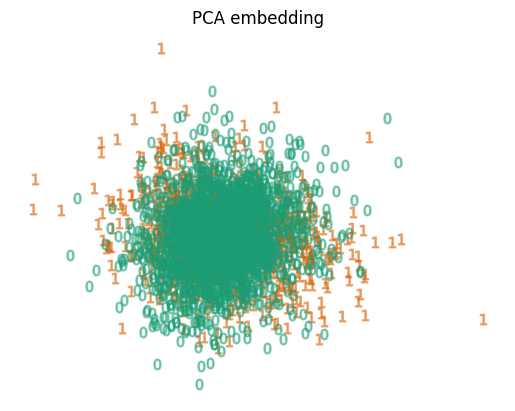

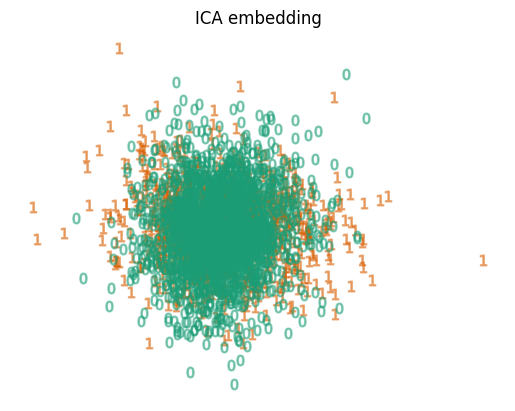

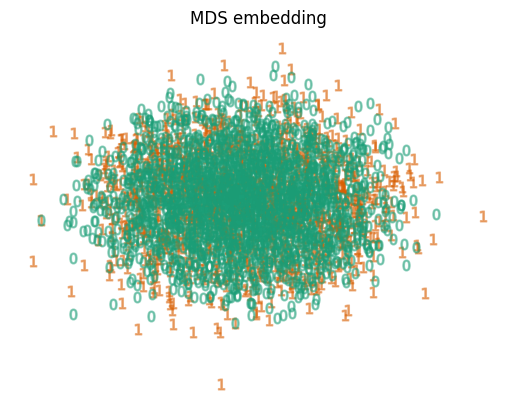

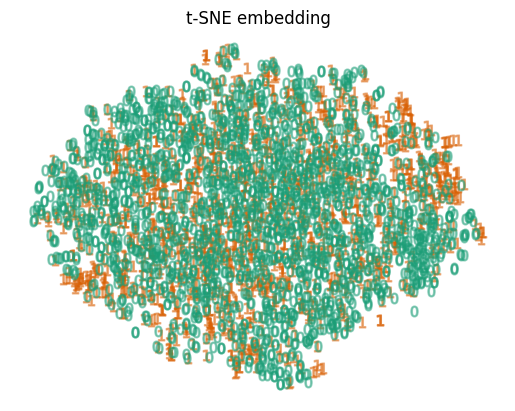

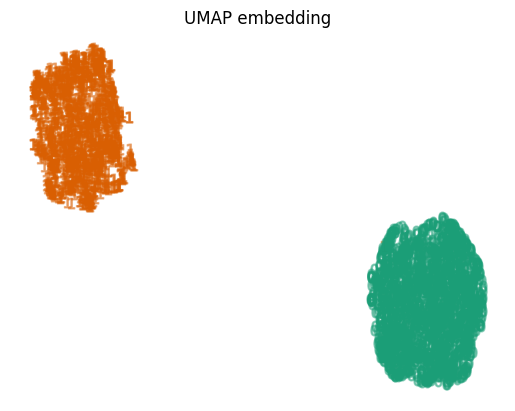

In [9]:
for name in embeddings.keys():
    plot_embedding(projections[name], name)

Vemos que los modelos que reducen dimensiones no nos sugieren algun patron en los datos que podamos tener en cuenta para aplicar algun modelo.

En los modelos de visualizacion no se observan muchas diferencias (tal vez habria que encontrar los parámetros óptimos para poder encontrar patrones en T-SNE), salvo en UMAP. Donde se ven clusteres bien definidos.

**Esto nos sugiere que en algun espacio, existe un método de clusterización que puede llegar a separar (clasificar) nuestro dataset.**